In [23]:
from google.colab import files
uploaded = files.upload()
!pip install pandas
import pandas as pd
df = pd.read_excel('/content/housing.xlsx')


Saving housing.xlsx to housing (3).xlsx


In [24]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


Optimized Weights: [68118.65617528  7668.21036871  1371.85420187  7192.83615779
  5660.86691852  2337.53695255  1735.249977    2579.90079751
  2682.91329031  5885.4222058   3653.40859324  3973.34075072]
Root Mean Squared Error (RMSE): 15252.788135159275


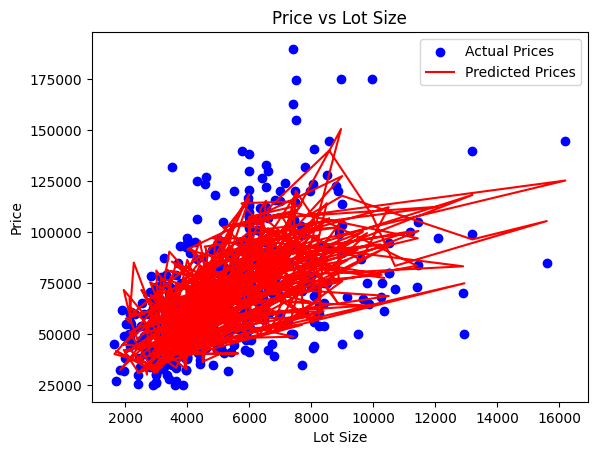

In [25]:
 import pandas as pd
 import numpy as np
 import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib for plotting

 #Convert categorical variables to numerical
for column in ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']:
    df[column] = df[column].apply(lambda x: 1 if x == 'yes' else 0)

df.head()

# Feature normalization
def normalize_features(features):
    mean = np.mean(features, axis=0)
    std = np.std(features, axis=0)
    return (features - mean) / std

X = df.drop('price', axis=1).values
y = df['price'].values

X = normalize_features(X)

# Add a column of ones for the bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize weights
theta = np.zeros(X.shape[1])

# Gradient descent parameters
alpha = 0.01
num_iterations = 1000

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

# Gradient descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)


# Calculate RMSE
rmse = np.sqrt(2 * cost_history[-1])

print('Optimized Weights:', theta)
print('Root Mean Squared Error (RMSE):', rmse)

# Plot 'price' vs 'lotsize'
plt.scatter(df['lotsize'], df['price'], color='blue', label='Actual Prices')
plt.plot(df['lotsize'], X.dot(theta), color='red', label='Predicted Prices')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.legend()
plt.title('Price vs Lot Size')
plt.show()

Weights from Normal Equation: [-4.03835043e+03  3.54630297e+00  1.83200347e+03  1.43355585e+04
  6.55694571e+03  6.68777889e+03  4.51128383e+03  5.45238554e+03
  1.28314063e+04  1.26328904e+04  4.24482900e+03  9.36951324e+03]
RMSE from Normal Equation: 15252.758811555845

Weights from Scikit-learn: [-4038.3504250983824, 3.5463029700849362, 1832.0034656485477, 14335.558468345615, 6556.94571149102, 6687.778890416117, 4511.283826105556, 5452.385539447686, 12831.406266411801, 12632.89040481588, 4244.829004332623, 9369.513238928876]
RMSE from Scikit-learn: 15252.758811555845


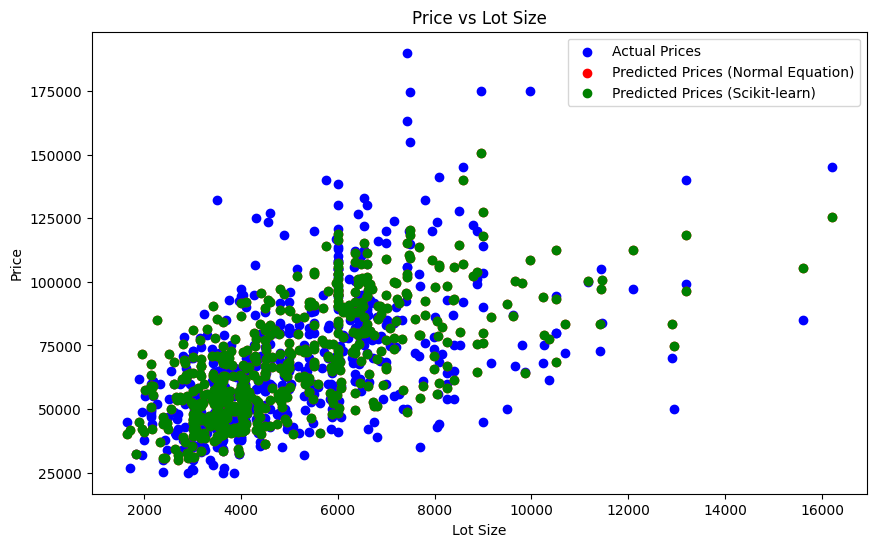

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


# Convert categorical variables to numerical values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.Categorical(df[column]).codes

# Extract features and target
X = df.drop('price', axis=1).values
y = df['price'].values

# Add a bias term to the features
X = np.c_[np.ones(X.shape[0]), X]

# Normal Equation
theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
predictions_normal = X.dot(theta_normal)
rmse_normal = np.sqrt(mean_squared_error(y, predictions_normal))

print('Weights from Normal Equation:', theta_normal)
print('RMSE from Normal Equation:', rmse_normal)

# Linear Regression using scikit-learn
model = LinearRegression()
model.fit(df.drop('price', axis=1), y)
predictions_sklearn = model.predict(df.drop('price', axis=1))
rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))

print('\nWeights from Scikit-learn:', [model.intercept_] + list(model.coef_))
print('RMSE from Scikit-learn:', rmse_sklearn)

# Plotting 'price' vs 'lotsize'
plt.figure(figsize=(10, 6))
plt.scatter(df['lotsize'], y, color='blue', label='Actual Prices')
plt.scatter(df['lotsize'], predictions_normal, color='red', label='Predicted Prices (Normal Equation)')
plt.scatter(df['lotsize'], predictions_sklearn, color='green', label='Predicted Prices (Scikit-learn)')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.legend()
plt.title('Price vs Lot Size')
plt.show()

Weights from scikit-learn Linear Regression: [0.00000000e+00 3.54630297e+00 1.83200347e+03 1.43355585e+04
 6.55694571e+03 6.68777889e+03 4.51128383e+03 5.45238554e+03
 1.28314063e+04 1.26328904e+04 4.24482900e+03 9.36951324e+03]
RMSE from scikit-learn Linear Regression: 15252.758811555845


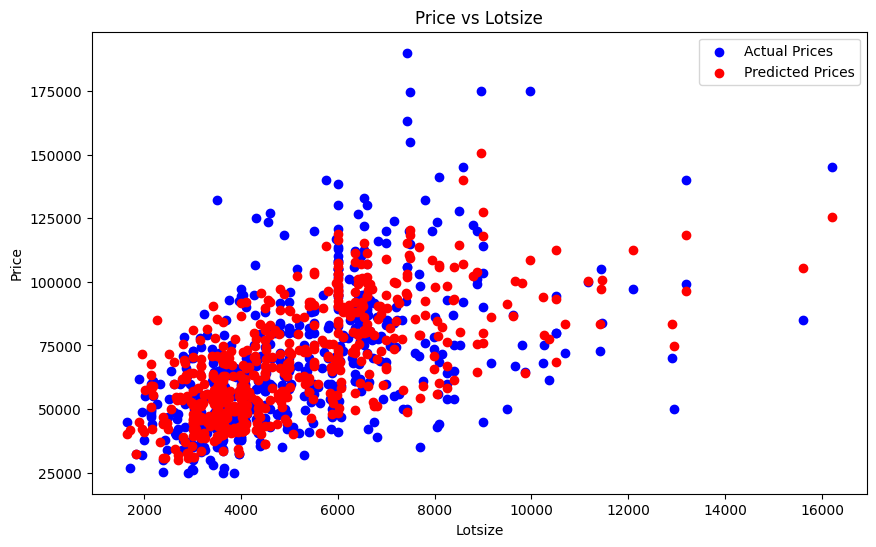

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the prices
predictions_sklearn = model.predict(X)

# Calculate RMSE
rmse_sklearn = np.sqrt(mean_squared_error(y, predictions_sklearn))

# Print the weights and RMSE
print('Weights from scikit-learn Linear Regression:', model.coef_)
print('RMSE from scikit-learn Linear Regression:', rmse_sklearn)

# Plot 'price' vs 'lotsize'
plt.figure(figsize=(10, 6))
plt.scatter(df['lotsize'], y, color='blue', label='Actual Prices')
plt.scatter(df['lotsize'], predictions_sklearn, color='red', label='Predicted Prices')
plt.title('Price vs Lotsize')
plt.xlabel('Lotsize')
plt.ylabel('Price')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.50168e-44): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.75084e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.50168e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.75084e-42): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

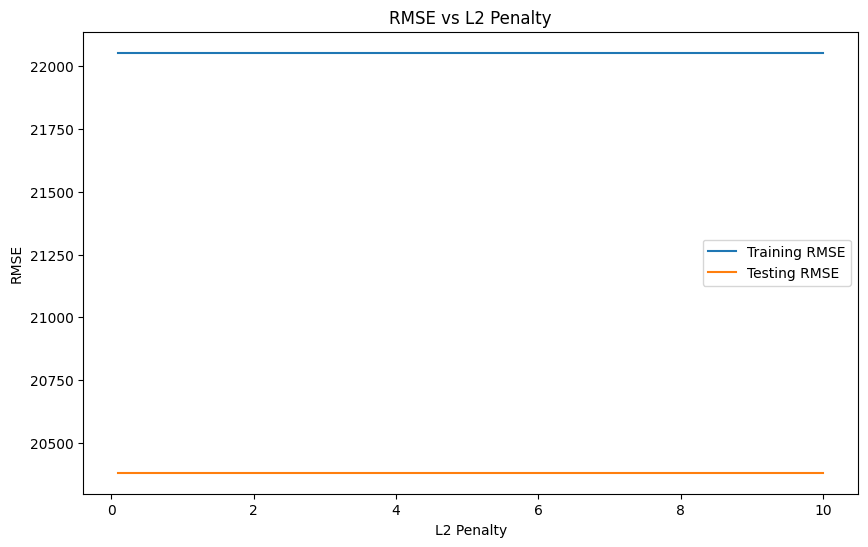

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['lotsize']], y, test_size=0.3, random_state=123)

# Creating polynomial features
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Ridge regression with different L2 penalty values
l2_penalties = [0.1, 0.5, 1, 5, 10]
train_errors = []
test_errors = []
weights = []

for alpha in l2_penalties:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly, y_train)

    train_predictions = ridge.predict(X_train_poly)
    test_predictions = ridge.predict(X_test_poly)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

    train_errors.append(train_rmse)
    test_errors.append(test_rmse)
    weights.append(ridge.coef_)

# Plotting RMSE for different L2 penalty values
plt.figure(figsize=(10, 6))
plt.plot(l2_penalties, train_errors, label='Training RMSE')
plt.plot(l2_penalties, test_errors, label='Testing RMSE')
plt.xlabel('L2 Penalty')
plt.ylabel('RMSE')
plt.title('RMSE vs L2 Penalty')
plt.legend()
plt.show()


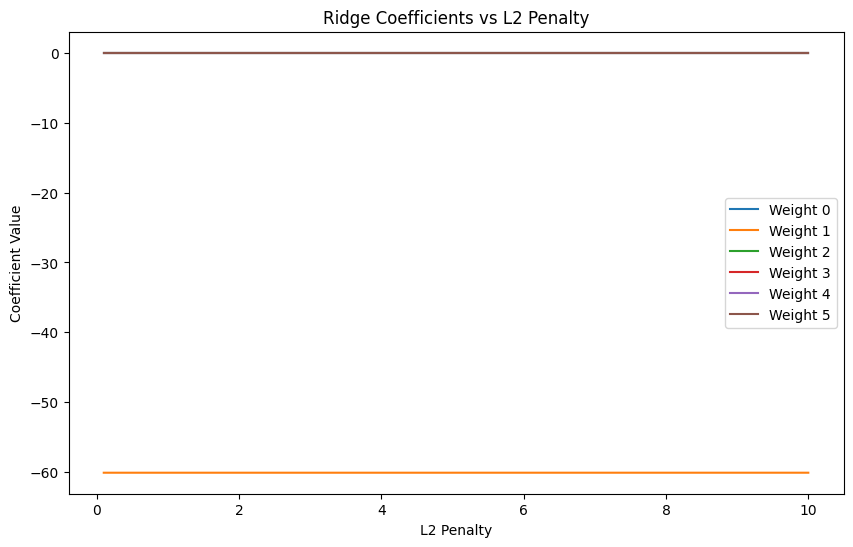

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.50168e-42): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


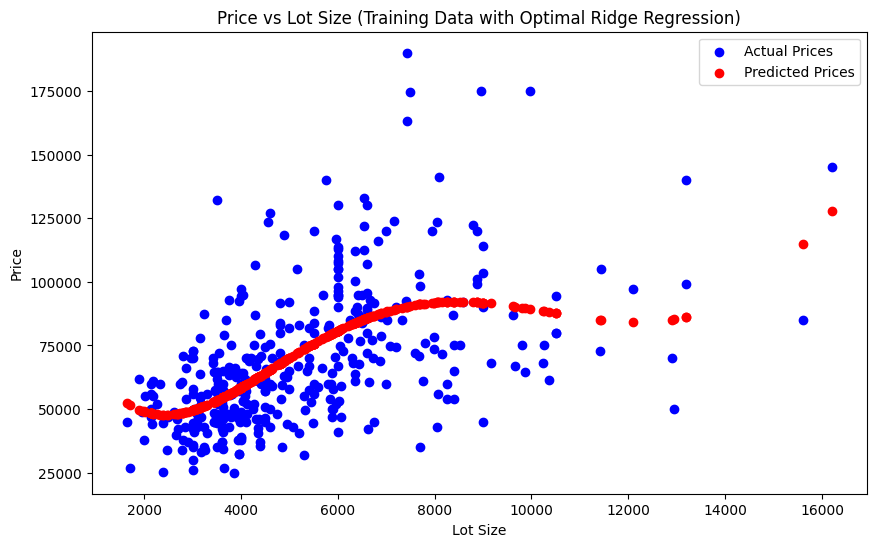

Optimized Weight Values: [ 0.00000000e+00 -6.00924373e+01  1.97821523e-02 -2.42302703e-06
  1.25527296e-10 -2.27811538e-15]
Training RMSE with Optimal L2 Penalty: 22053.391445238256
Testing RMSE with Optimal L2 Penalty: 20381.167926905953


In [29]:
# 5. Plotting weight coefficients for different L2 penalty values
weights = np.array(weights)
plt.figure(figsize=(10, 6))
for i in range(weights.shape[1]):
    plt.plot(l2_penalties, weights[:, i], label=f'Weight {i}')
plt.xlabel('L2 Penalty')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients vs L2 Penalty')
plt.legend()
plt.show()

# 6. Fit the data using the Ridge regression model with the optimum L2 penalty
optimal_l2_penalty = l2_penalties[np.argmin(test_errors)]
ridge_optimal = Ridge(alpha=optimal_l2_penalty)
ridge_optimal.fit(X_train_poly, y_train)
train_predictions_optimal = ridge_optimal.predict(X_train_poly)
test_predictions_optimal = ridge_optimal.predict(X_test_poly)

# Plotting 'price' vs 'lotsize' for the training data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Prices')
plt.scatter(X_train, train_predictions_optimal, color='red', label='Predicted Prices')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Price vs Lot Size (Training Data with Optimal Ridge Regression)')
plt.legend()
plt.show()

# Printing out the optimized weight values and RMSE for training/test data
print('Optimized Weight Values:', ridge_optimal.coef_)
print('Training RMSE with Optimal L2 Penalty:', np.sqrt(mean_squared_error(y_train, train_predictions_optimal)))
print('Testing RMSE with Optimal L2 Penalty:', np.sqrt(mean_squared_error(y_test, test_predictions_optimal)))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.335e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.335e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.335e+10, tolerance: 2.799e

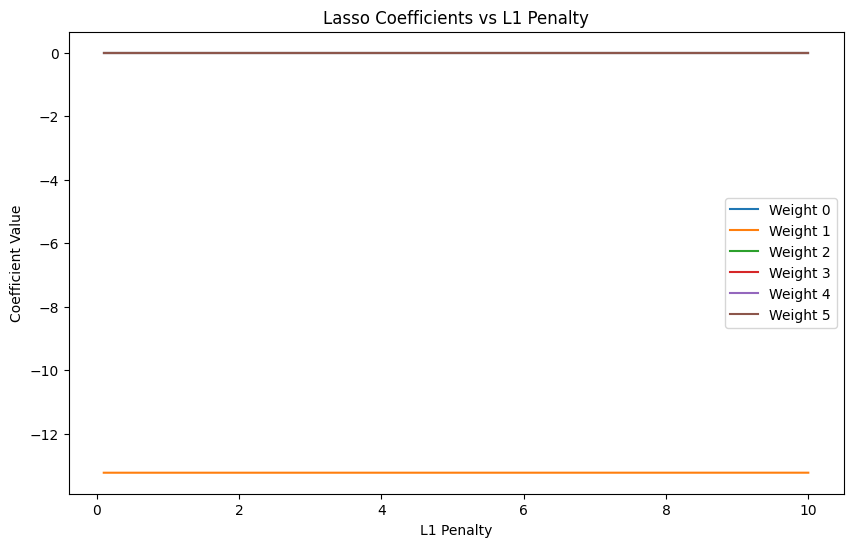

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.335e+10, tolerance: 2.799e+07
  model = cd_fast.enet_coordinate_descent(


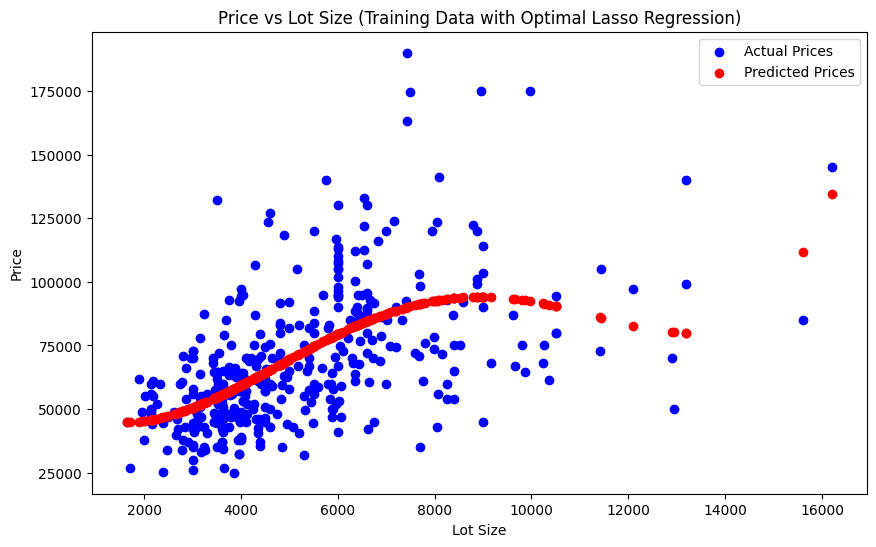

Optimized Weight Values with Lasso: [ 0.00000000e+00 -1.32243958e+01  5.05199062e-03 -3.42682751e-07
 -7.96891672e-12  8.73324370e-16]
Training RMSE with Optimal L1 Penalty: 22107.375276982664
Testing RMSE with Optimal L1 Penalty: 20419.67071393119


In [30]:
from sklearn.linear_model import Lasso

# 1. Fit the training data using Lasso regression for different L1 penalty values
l1_penalties = [0.1, 0.5, 1, 5, 10]
weights_lasso = []
train_errors_lasso = []
test_errors_lasso = []

for l1_penalty in l1_penalties:
    lasso = Lasso(alpha=l1_penalty, max_iter=10000)
    lasso.fit(X_train_poly, y_train)
    weights_lasso.append(lasso.coef_)
    train_errors_lasso.append(mean_squared_error(y_train, lasso.predict(X_train_poly)))
    test_errors_lasso.append(mean_squared_error(y_test, lasso.predict(X_test_poly)))

# 2. Search for the optimum L1 penalty based on RMSE of train/test data
optimal_l1_penalty_index = np.argmin(test_errors_lasso)
optimal_l1_penalty = l1_penalties[optimal_l1_penalty_index]

# 3. Plot weight coefficients with different L1 penalty values
weights_lasso = np.array(weights_lasso)
plt.figure(figsize=(10, 6))
for i in range(weights_lasso.shape[1]):
    plt.plot(l1_penalties, weights_lasso[:, i], label=f'Weight {i}')
plt.xlabel('L1 Penalty')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs L1 Penalty')
plt.legend()
plt.show()

# 4. Fit the data using the Lasso regression model with the optimum L1 penalty
lasso_optimal = Lasso(alpha=optimal_l1_penalty, max_iter=10000)
lasso_optimal.fit(X_train_poly, y_train)
train_predictions_lasso_optimal = lasso_optimal.predict(X_train_poly)
test_predictions_lasso_optimal = lasso_optimal.predict(X_test_poly)

# Plotting 'price' vs 'lotsize' for the training data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Actual Prices')
plt.scatter(X_train, train_predictions_lasso_optimal, color='red', label='Predicted Prices')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Price vs Lot Size (Training Data with Optimal Lasso Regression)')
plt.legend()
plt.show()

# Printing out the optimized weight values and RMSE for training/test data
print('Optimized Weight Values with Lasso:', lasso_optimal.coef_)
print('Training RMSE with Optimal L1 Penalty:', np.sqrt(mean_squared_error(y_train, train_predictions_lasso_optimal)))
print('Testing RMSE with Optimal L1 Penalty:', np.sqrt(mean_squared_error(y_test, test_predictions_lasso_optimal)))


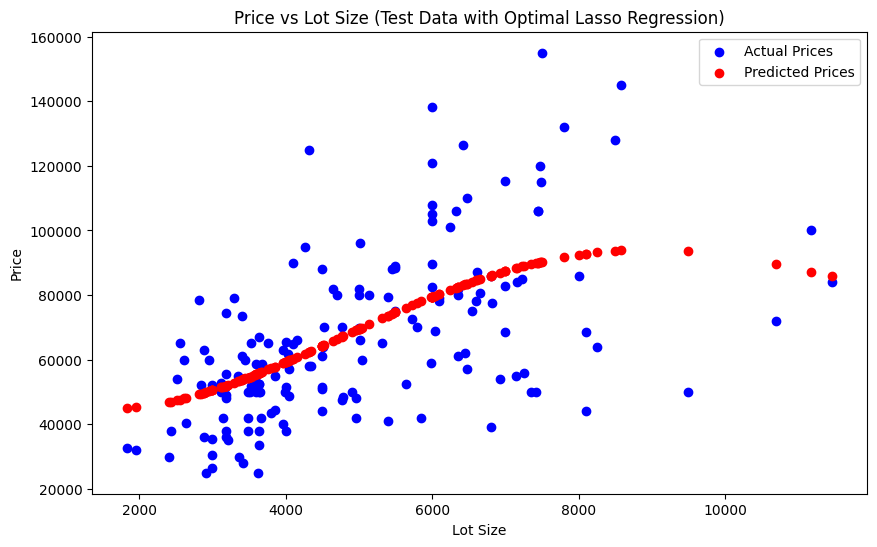

Summary for Lasso Regression with Optimal L1 Penalty:
----------------------------------------------------
Optimal L1 Penalty: 10
Optimized Weight Values with Lasso: [ 0.00000000e+00 -1.32243958e+01  5.05199062e-03 -3.42682751e-07
 -7.96891672e-12  8.73324370e-16]
Training RMSE with Optimal L1 Penalty: 22107.375276982664
Testing RMSE with Optimal L1 Penalty: 20419.67071393119


In [31]:
# Plotting 'price' vs 'lotsize' for the test data and the model's predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, test_predictions_lasso_optimal, color='red', label='Predicted Prices')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.title('Price vs Lot Size (Test Data with Optimal Lasso Regression)')
plt.legend()
plt.show()

# Summarizing the results
print('Summary for Lasso Regression with Optimal L1 Penalty:')
print('----------------------------------------------------')
print('Optimal L1 Penalty:', optimal_l1_penalty)
print('Optimized Weight Values with Lasso:', lasso_optimal.coef_)
print('Training RMSE with Optimal L1 Penalty:', np.sqrt(mean_squared_error(y_train, train_predictions_lasso_optimal)))
print('Testing RMSE with Optimal L1 Penalty:', np.sqrt(mean_squared_error(y_test, test_predictions_lasso_optimal)))
